<a href="https://colab.research.google.com/github/Saikiran4545/linear-regression/blob/main/Regression_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Library and **Dataset**

In [1]:
# Import library
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')


<ipython-input-1-1d8329d7ac11>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [5]:
df = pd.read_csv('/content/drive/MyDrive/insurance.csv')
print('\nNumber of rows and columns in the data set: ',df.shape)
print('')


Number of rows and columns in the data set:  (1338, 7)



In [6]:
#Lets look into top few rows and columns in the dataset
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


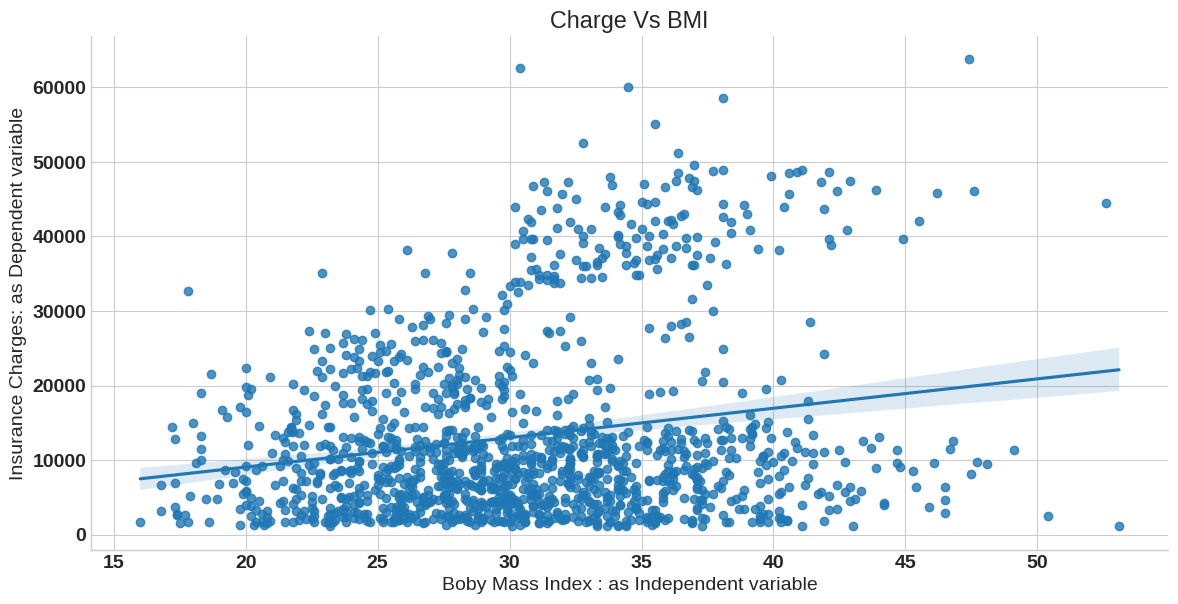

In [9]:
""" for our visualization purpose will fit line using seaborn library only for bmi as independent variable
and charges as dependent variable"""

sns.lmplot(x='bmi',y='expenses',data=df,aspect=2,height=6)
plt.xlabel('Boby Mass Index : as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charge Vs BMI');

**Exploratory data analysis**

In [10]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


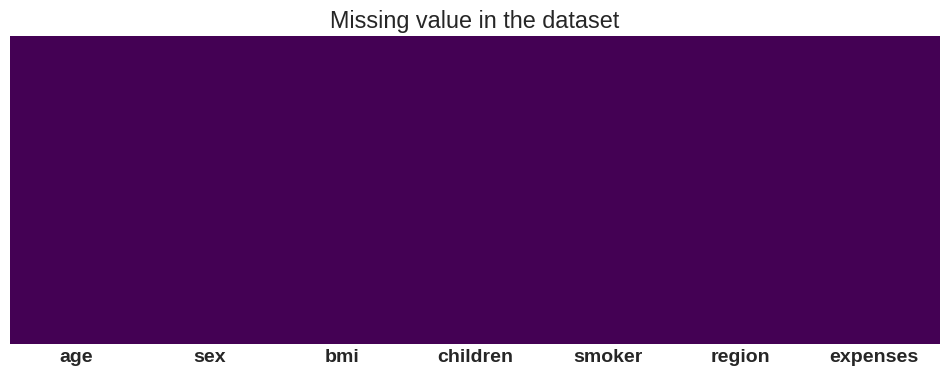

In [14]:
#Check for missing value¶
#There is no missing value in the data set
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

<ipython-input-15-2ed08589afc1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


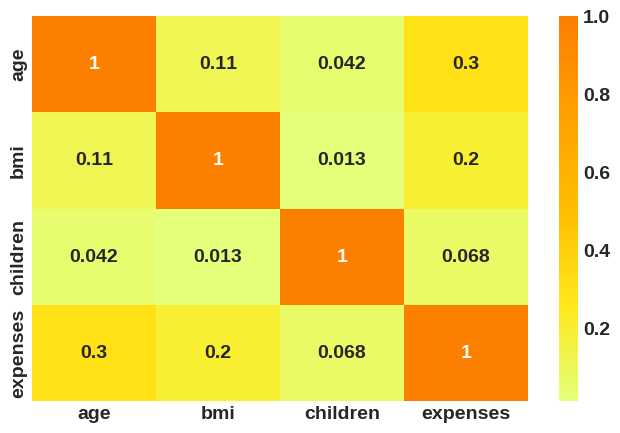

In [15]:
# correlation plot
#Thier no correlation among valiables.
corr = df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);


<ipython-input-19-9cacc1bc250a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['expenses'],bins=50,color='r',ax=ax)
<ipython-input-19-9cacc1bc250a>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(df['expenses']),bins=40,color='b',ax=ax)


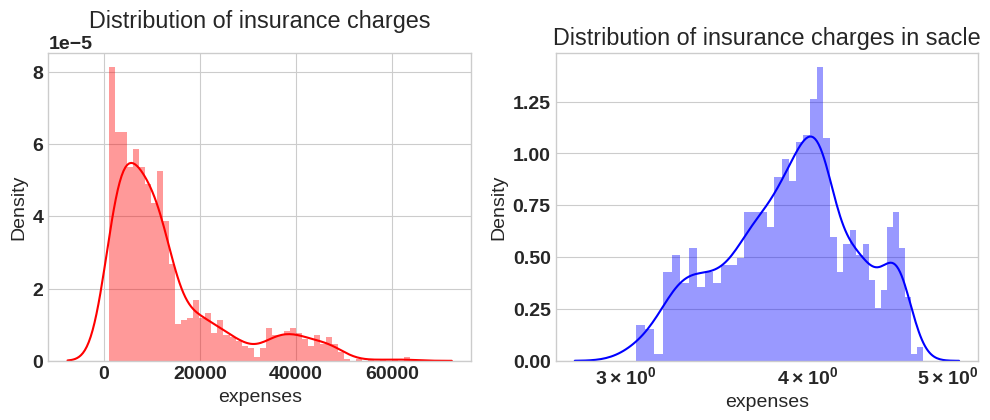

In [19]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['expenses'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['expenses']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in sacle')
ax.set_xscale('log');

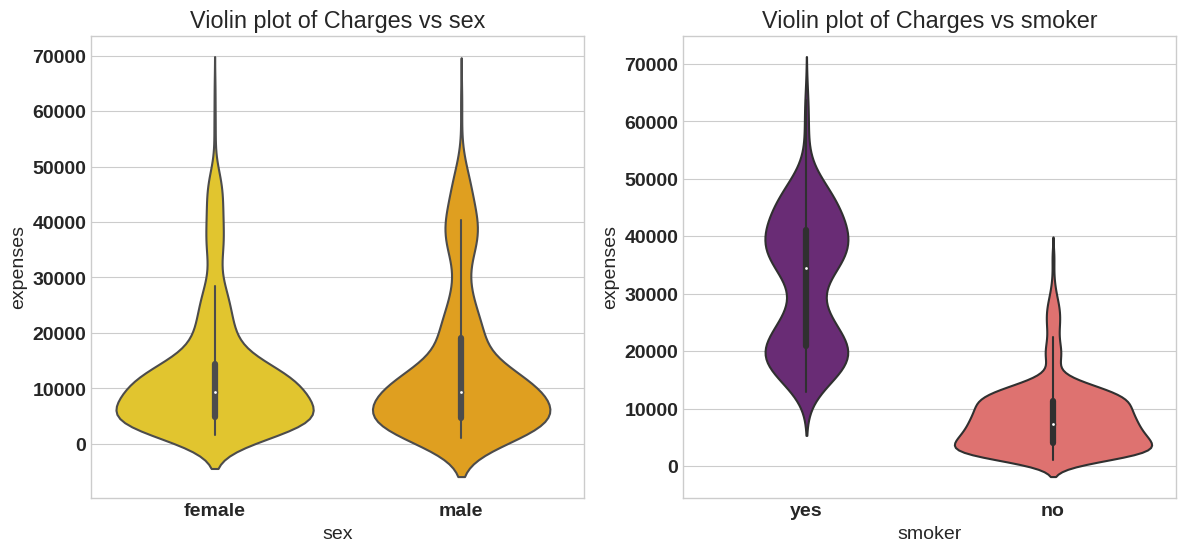

In [22]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='sex', y='expenses',data=df,palette='Wistia',ax=ax)
ax.set_title('Violin plot of Charges vs sex')

ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='expenses',data=df,palette='magma',ax=ax)
ax.set_title('Violin plot of Charges vs smoker');


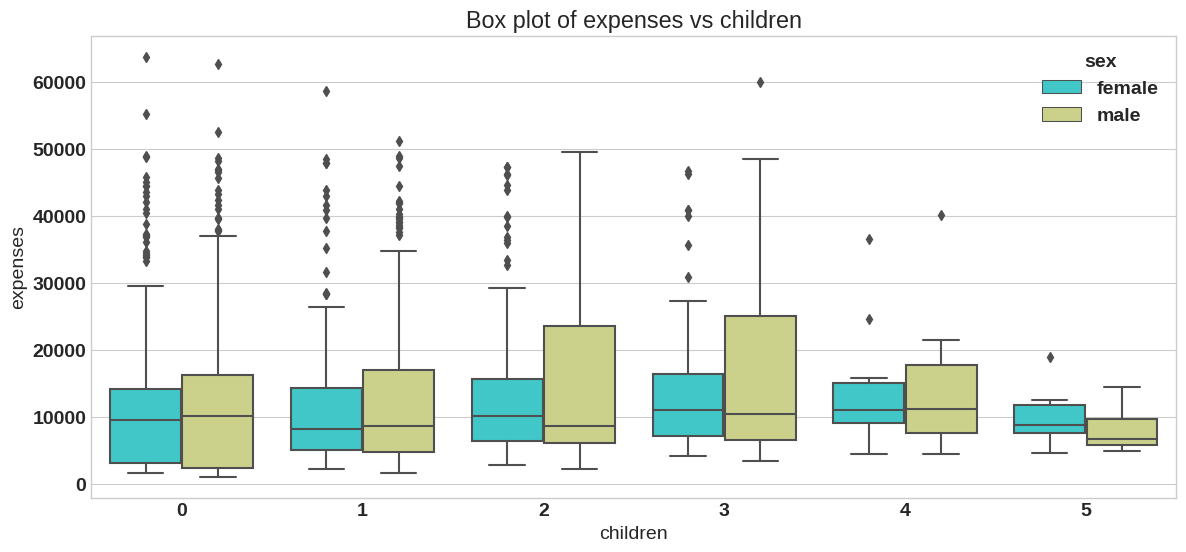

In [24]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='expenses',hue='sex',data=df,palette='rainbow')
plt.title('Box plot of expenses vs children');


In [26]:
df.children.nunique()

6

In [28]:
df.groupby('children').agg(['mean','min','max'])['expenses']


<ipython-input-28-c7935316377e>:1: FutureWarning: ['sex', 'smoker', 'region'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('children').agg(['mean','min','max'])['expenses']


,mean,min,max
children,,,
0,12365.975767,1121.87,63770.43
1,12731.171821,1711.03,58571.07
2,15073.564000,2304.00,49577.66
3,15355.318535,3443.06,60021.40
4,13850.656800,4504.66,40182.25
5,8786.035556,4687.80,19023.26


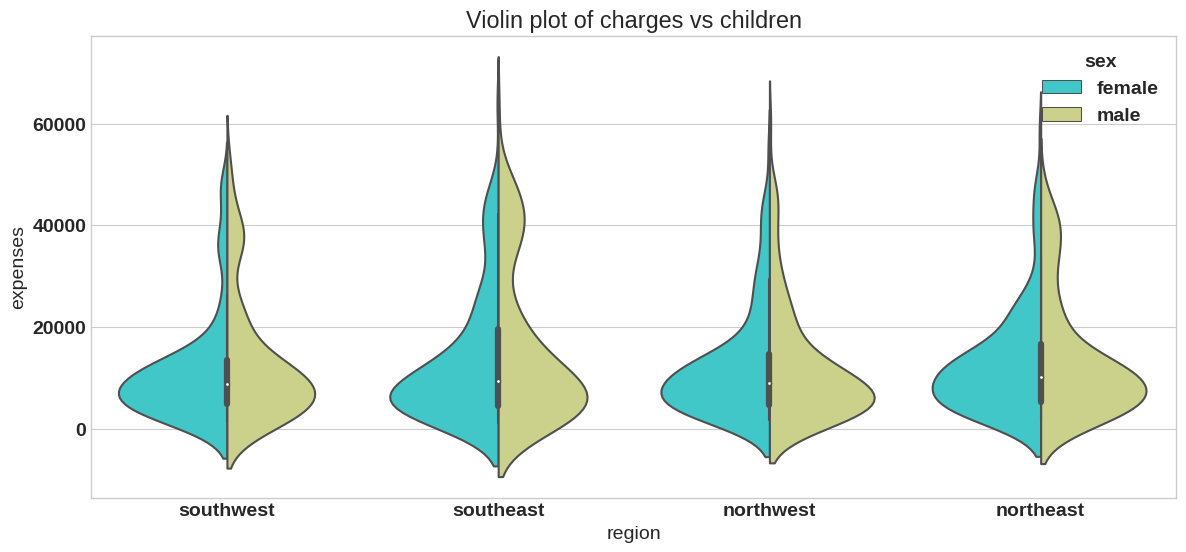

In [30]:
plt.figure(figsize=(14,6))
sns.violinplot(x='region', y='expenses',hue='sex',data=df,palette='rainbow',split=True)
plt.title('Violin plot of charges vs children');


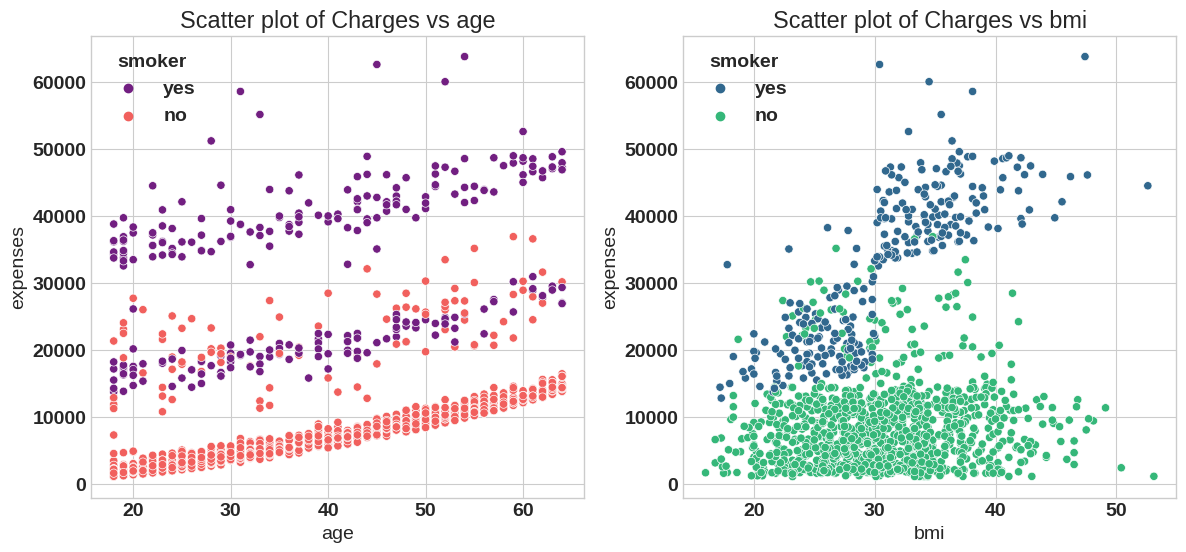

In [31]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='expenses',data=df,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='expenses',data=df,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')
plt.savefig('sc.png');

**Data Preprocessing**

In [32]:
# Dummy variable
categorical_columns = ['sex','children', 'smoker', 'region']
df_encode = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')


In [33]:
# Lets verify the dummay variable process
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:
 ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'expenses']

Number of rows and columns in the dataset: (1338, 7)

Columns in data frame after encoding dummy variable:
 ['age' 'bmi' 'expenses' 'OHE_male' 'OHE_1' 'OHE_2' 'OHE_3' 'OHE_4' 'OHE_5'
 'OHE_yes' 'OHE_northwest' 'OHE_southeast' 'OHE_southwest']

Number of rows and columns in the dataset: (1338, 13)


**Train-Test split**

In [35]:
from sklearn.model_selection import train_test_split
X = df_encode.drop('expenses',axis=1) # Independet variable
y = df_encode['expenses'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)


**Model building**

In [36]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)


LinearRegression()

In [37]:
# Finding interception and coefficients
print(lin_reg.intercept_)
print(list(lin_reg.coef_))


-11743.443575558727
[246.2468426487711, 348.1390389005044, -127.757467433469, 322.661986867762, 1476.8539871367557, 1197.2638137986971, 3769.0456838944133, 1967.305391096582, 24251.35921165408, -551.2540111387881, -1180.673732563397, -1512.327064241146]


In [38]:
# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)


The Mean Square Error(MSE) or J(theta) is:  35150677.79687561
R square obtain for scikit learn library is : 0.7305391312270825
